<h1>TEAM NAME: ADANSO

    
<h3>Team Members:<br><br>
1. Adarsh Anand <br>
2. Aniket Chaudhri <br>
3. Somesh Agrawal

In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [10]:
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [11]:
mnist_df=pd.DataFrame(mnist_data)
mnist_df["y"]=mnist_label
mnist_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [6]:
df.columns = ['eruptions','waiting']

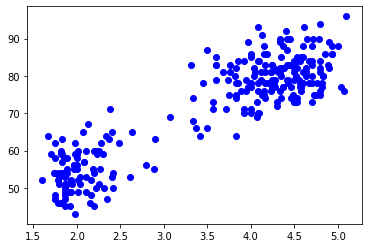

In [7]:
plt.scatter(df["eruptions"],df['waiting'], c = 'blue', marker = 'o',label = 'Displaying points on a graph'  )
plt.show()

In [9]:
def calculatez(mean, covariance):
    x, y = np.mgrid[-1:2:.05, -1:2:.05]
    data = np.column_stack([x.flat, y.flat])
    z = mvn.pdf(data,mean, covariance).reshape(x.shape)
    return x,y,z

In [11]:
def Estep(X,mean,covariance,coeff):
    K=mean.shape[0]
    gamma = np.zeros(shape=(X.shape[0], K))
    for k in range(K):
        gamma[:, k] = mvn.pdf(X, mean[k], covariance[k]) * coeff[k]
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True)
    return gamma